In [ ]:
!git clone https://github.com/evgmaslov/structure_generation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [1]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 16.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 M

In [1]:
import numpy as np
import torch
from torch import nn
import math
from typing import Optional, Tuple, Union, List
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import shutil
from diffusers import DDPMScheduler, UNet3DConditionModel, UNet2DModel, DDPMPipeline
from diffusers.optimization import get_cosine_schedule_with_warmup
from accelerate import Accelerator

## Downloading sources, if you use kaggle

In [ ]:
!conda install -y gdown

In [ ]:
import gdown
url = 'https://drive.google.com/uc?export=download&id=1hDhDttFpZ_-TDVo_-yBzhafh75mvis6L'
data_path = '/kaggle/working/dataset.zip'
gdown.download(url, data_path)

## Downloading sources, if you use colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/structure_generation/dataset.zip"

Mounted at /content/drive


In [ ]:
!unzip {data_path}

## Training

In [ ]:
from data import TesselationDataset, collate_fn
from models import DiffusersDDPM3D
from utils import Trainer

In [6]:
train_names, val_names = train_test_split(os.listdir("/content/dataset")[:1000], test_size=0.1)

In [7]:
batch_size = 2
train_data_params = {
    "tess_dir":"/content/dataset",
    "names":train_names,
    "dims":3
}
train_dataset = TesselationDataset(train_data_params)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: collate_fn(x, train_dataset))

val_data_params = {
    "tess_dir":"/content/dataset",
    "names":val_names,
    "dims":3
}
val_dataset = TesselationDataset(val_data_params)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: collate_fn(x, val_dataset))

trainer_args = {
    "train_dataloader":train_dataloader,
    "val_dataloader":val_dataloader,
    "score":None,
    "train_score_computing_frequency":1,
    "optimizer":torch.optim.AdamW,
    "optimizer_args":{"lr":3e-4},
    "scheduler":get_cosine_schedule_with_warmup,
    "scheduler_args":{
        "num_warmup_steps":100,
        "num_training_steps":(len(train_dataloader) * 2)
    },
    "freezer":None,
    "freezer_args":None,
    "training_controller":None,
    "n_epochs":50,
    "device":"cuda" if torch.cuda.is_available() else "cpu",
    "backup_path":"/content/drive/MyDrive/structure_generation/model_difusers3d_v1.pt",
    "show_outputs":True,
    "show_outputs_every":2,
    "n_outputs":1,
    "is_saving_history":False,
}

trainer = Trainer(trainer_args)

In [8]:
model_args = {
    "device":trainer.device,
    "sample_shape": (32, 32, 32),
    "noise_scheduler": DDPMScheduler(num_train_timesteps=1000),
    "unet_n_blocks": 2,
    "unet_channels": 64,
    "is_attn":(False, False, True, True),
    "ch_mults":(1, 2, 2, 4),
    "channels":(64, 128, 128, 256),
}
model = DiffusersDDPM3D(model_args)

In [9]:
torch.cuda.empty_cache()

Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1. Train loss: 0.0599858154853185, val loss: 0.018192016528919337, train score: 0, val score: 0


Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2. Train loss: 0.014717523774209743, val loss: 0.009857242509024217, train score: 0, val score: 0
Output samples:



  0%|          | 0/1000 [00:00<?, ?it/s]

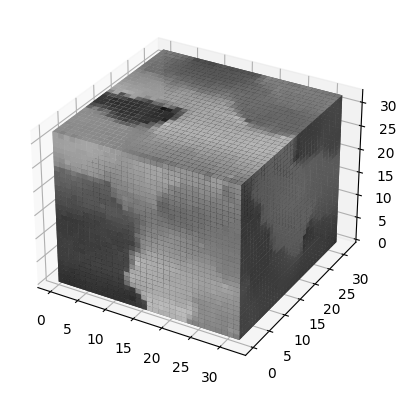

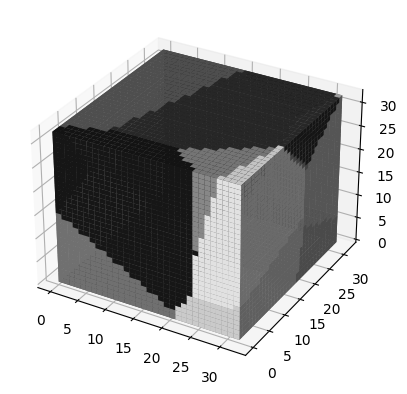

Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3. Train loss: 0.013267237105044639, val loss: 0.011236802686471488, train score: 0, val score: 0


Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4. Train loss: 0.018564208007365877, val loss: 0.012359667469281703, train score: 0, val score: 0
Output samples:



  0%|          | 0/1000 [00:00<?, ?it/s]

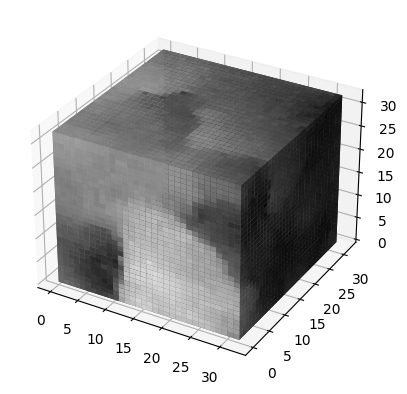

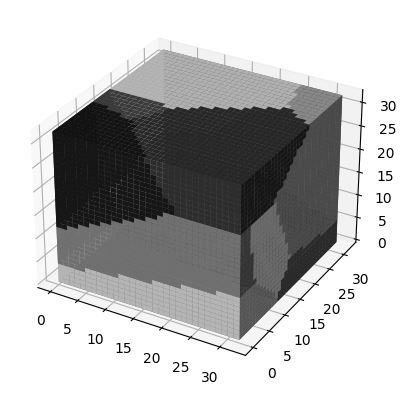

Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5. Train loss: 0.011347912665223702, val loss: 0.010095075060380623, train score: 0, val score: 0


Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 6. Train loss: 0.009072310465724312, val loss: 0.00992579998564906, train score: 0, val score: 0
Output samples:



  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
trainer.train(model)